# Q1



In [15]:
import keras
from keras.layers import *
from keras.optimizers import *
from keras.models import Model

import math
import numpy as np
import matplotlib.pyplot as plt


x = np.arange(0, 2).reshape(-1,1) / 100
mu = np.random.uniform(-0.8,0.8,(100,1))
y = 1/3 + 0.5 * np.sin(3*x*math.pi) + mu

inputs = Input(shape=(1,))
h = Dense(256, activation="relu")(inputs)
h = Dense(128, activation="relu")(h)
h = Dense(32, activation="relu")(h)
outputs = Dense(1, activation="linear")(h)
model = Model(inputs=inputs,outputs=outputs)

model.compile(loss='mean_squared_error', optimizer='SGD')

model.fit(x, y, epochs=1000, batch_size=32, verbose= 0)

pred = model.predict(x)

plt.plot(x, pred)
plt.plot(x ,y)
plt.title('MLP')
plt.legend(["predict", "y"])
plt.show()

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [5]:
def Gaussian(x, dot, dev): 
    return np.exp(-1 / (2 * dev**2) * (x-dot)**2)

In [6]:
def RBF_train(X, y, k, learning_rate, epochs=1000, epsilon=0.00001):
    dots = np.random.choice(X, size=k)
    prev = dots.copy()
    dev = np.zeros(k)
    is_finished = False

    w = np.random.randn(k)
    b = np.random.randn(1)

    while not is_finished:
        distances = np.abs(X[:, np.newaxis] - dots[np.newaxis, :])

        best_dot = np.argmin(distances, axis=1)

        for i in range(k):
            selected_data = X[best_dot == i]
            if len(selected_data) > 0:
                dots[i] = np.average(selected_data, axis=0) 

        is_finished = np.linalg.norm(dots - prev) < epsilon
        prev = dots.copy()

    distances = np.abs(X[:, np.newaxis] - dots[np.newaxis, :])
    best_dot = np.argmin(distances, axis=1)

    for i in range(k):
        dev[i] = np.std(X[best_dot == i])

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            z = np.array([Gaussian(X[i], dots[j], dev[j]) for j in range(len(dots))])
            H = z.T.dot(w) + b
    
            e = -(y[i] - H)

            w = w - learning_rate * z * e
            b = b - learning_rate * e
    return w, b, dots, dev

In [7]:
def predict(X, w, b, dots, dev):
    predictions = []
    for i in range(X.shape[0]):
        z = np.array([Gaussian(X[i], dots[j], dev[j]) for j in range(len(dots))])
        H = z.T.dot(w) + b
        predictions.append(H)
    return predictions

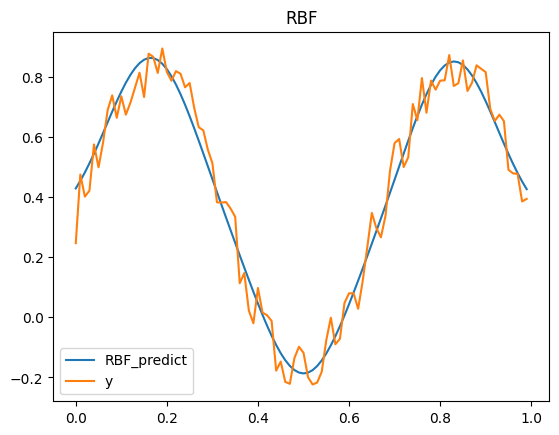

In [8]:
X = np.arange(0, 100) / 100
mu = np.random.uniform(-0.1,0.1,100)
y = 1/3 + 0.5 * np.sin(3*X*math.pi) + mu

RBF_w, RBF_b, RBF_dots, RBF_dev = RBF_train(X, y, 3, 0.01, 1000)

RBF_pred = predict(X, RBF_w, RBF_b, RBF_dots, RBF_dev)

plt.plot(X, RBF_pred)
plt.plot(X, y)
plt.legend(["RBF_predict", "y"])
plt.title('RBF')
plt.show()

NameError: name 'x' is not defined

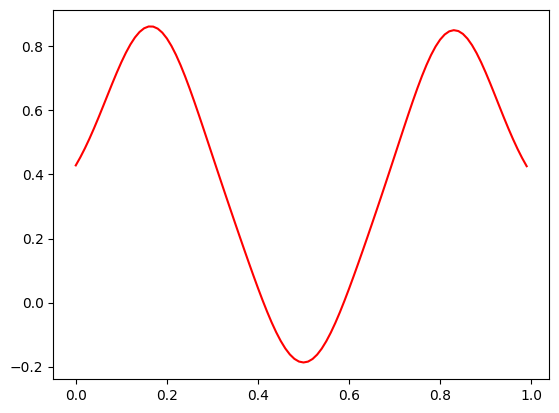

In [9]:
plt.plot(X, RBF_pred,'r')
plt.plot(x, pred)
plt.plot(X, y,'b')
plt.legend(["RBF_predict","MLP_predict", "y"])
plt.title('Compare Models')
plt.show()